# Looking at a single run with Polar H10

In [165]:
import gpxpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Create function to import GPX into Pandas

In [107]:
def read_data(fname):
    gpx_file = open(fname, 'r')
    gpx = gpxpy.parse(gpx_file)
    
    dfs = []
    
    data = gpx.tracks[0].segments[0].points
    for point in data:
        hr = point.extensions[1].find('{http://www.garmin.com/xmlschemas/TrackPointExtension/v1}hr').text
        
        power = None
        for extension in point.extensions:
            if extension.tag == 'power': 
                power = extension.text
        
        dfs.append({
            'time': point.time,
            'lon': point.longitude, 
            'lat': point.latitude, 
            'alt': point.elevation, 
            'hr':  hr,
            'pwr': power

        })
        
    return pd.DataFrame.from_records(
        dfs, 
        columns=[
            'time', 
            'lon', 
            'lat', 
            'alt',
            'hr',
            'pwr',
        ],
    )

Let's look at one particular run

In [118]:
df = read_data('data/Morning_Run_with_H10.gpx')
print(df.head(20))

                        time         lon       lat  alt   hr  pwr
0  2022-08-19 23:00:08+00:00  103.896697  1.309467  2.9  130   32
1  2022-08-19 23:00:09+00:00  103.896710  1.309472  2.9  130   44
2  2022-08-19 23:00:10+00:00  103.896720  1.309478  2.9  131   54
3  2022-08-19 23:00:11+00:00  103.896732  1.309482  2.9  131   58
4  2022-08-19 23:00:12+00:00  103.896747  1.309482  2.9  132   62
5  2022-08-19 23:00:13+00:00  103.896760  1.309487  2.9  132   60
6  2022-08-19 23:00:14+00:00  103.896775  1.309495  2.9  133   56
7  2022-08-19 23:00:15+00:00  103.896792  1.309505  2.9  133   52
8  2022-08-19 23:00:16+00:00  103.896818  1.309515  2.9  135   56
9  2022-08-19 23:00:17+00:00  103.896850  1.309527  2.9  135   68
10 2022-08-19 23:00:18+00:00  103.896893  1.309540  2.9  136   88
11 2022-08-19 23:00:19+00:00  103.896940  1.309547  2.9  137  108
12 2022-08-19 23:00:20+00:00  103.896982  1.309552  2.9  138  132
13 2022-08-19 23:00:21+00:00  103.897018  1.309557  2.9  138  152
14 2022-08

We do need some formatting

In [128]:
df["hr"] = pd.to_numeric(df["hr"])
df["pwr"] = pd.to_numeric(df["pwr"])
print(df.dtypes)

time    datetime64[ns, SimpleTZ("Z")]
lon                           float64
lat                           float64
alt                           float64
hr                              int64
pwr                             int64
dtype: object


In [148]:
df.sort_values(['hr', 'pwr'], ascending=[False, False]).head(100)

,time,lon,lat,alt,hr,pwr
1041,2022-08-19 23:17:29+00:00,103.894317,1.294917,2.9,175,360
1042,2022-08-19 23:17:30+00:00,103.894287,1.294917,2.9,175,360
1040,2022-08-19 23:17:28+00:00,103.894348,1.294912,1.8,175,356
1036,2022-08-19 23:17:24+00:00,103.894477,1.294893,1.8,175,354
1043,2022-08-19 23:17:31+00:00,103.894258,1.294913,2.9,175,354
...,...,...,...,...,...,...
1696,2022-08-19 23:28:24+00:00,103.877017,1.293105,4.9,173,270
3646,2022-08-20 00:00:54+00:00,103.877212,1.298458,6.9,173,176
3647,2022-08-20 00:00:55+00:00,103.877213,1.298470,6.9,173,174
3648,2022-08-20 00:00:56+00:00,103.877220,1.298480,6.9,173,174


Taking a look at the distribution of data

In [133]:
df.describe()

,lon,lat,alt,hr,pwr
count,4795.000000,4795.000000,4795.000000,4795.000000,4795.000000
mean,103.883169,1.296697,1.391366,157.715328,260.472993
std,0.010714,0.007381,5.702369,8.638699,124.442955
min,103.867228,1.280863,-205.100000,130.000000,0.000000
25%,103.875272,1.292870,0.900000,152.000000,160.000000
50%,103.880340,1.296387,0.900000,158.000000,300.000000
75%,103.892851,1.302615,2.900000,164.000000,328.000000
max,103.901787,1.309557,7.900000,175.000000,1800.000000


Unique values of heart rate

In [157]:
df.hr.value_counts().sort_index(ascending=False)

175     20
174     31
173     49
172     87
171    103
170    133
169    106
168    134
167    140
166    128
165    188
164    219
163    210
162    194
161    219
160    188
159    198
158    212
157    202
156    204
155    185
154    148
153    145
152    176
151    126
150    162
149    171
148    140
147     75
146     71
145     89
144     54
143     48
142     42
141     54
140     45
139     19
138     11
137     17
136     11
135     12
134      4
133     10
132      8
131      5
130      2
Name: hr, dtype: int64

When did I have max heart rate?

In [156]:
df[df.hr == 175]

,time,lon,lat,alt,hr,pwr
1036,2022-08-19 23:17:24+00:00,103.894477,1.294893,1.8,175,354
1040,2022-08-19 23:17:28+00:00,103.894348,1.294912,1.8,175,356
1041,2022-08-19 23:17:29+00:00,103.894317,1.294917,2.9,175,360
1042,2022-08-19 23:17:30+00:00,103.894287,1.294917,2.9,175,360
1043,2022-08-19 23:17:31+00:00,103.894258,1.294913,2.9,175,354
1044,2022-08-19 23:17:32+00:00,103.894225,1.294908,2.9,175,350
1045,2022-08-19 23:17:33+00:00,103.894193,1.294907,2.9,175,348
1046,2022-08-19 23:17:34+00:00,103.894162,1.294902,2.9,175,346
1047,2022-08-19 23:17:35+00:00,103.894130,1.294898,2.9,175,346
1048,2022-08-19 23:17:36+00:00,103.894107,1.294897,2.9,175,342


array([[<AxesSubplot:title={'center':'hr'}>]], dtype=object)

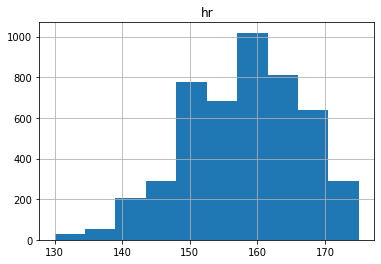

In [137]:
df.hist(column='hr')

Distribution of power for different heart rates

In [144]:
df.groupby('hr').pwr.agg(['max', 'min', 'count', 'median', 'mean'])

,max,min,count,median,mean
hr,,,,,
130,44,32,2,38.0,38.000000
131,58,0,5,40.0,30.400000
132,62,38,8,40.0,45.250000
133,170,0,10,43.0,50.600000
134,256,0,4,128.0,128.000000
135,336,0,12,197.0,197.500000
136,322,0,11,166.0,158.909091
137,342,0,17,166.0,158.705882
138,346,0,11,152.0,153.636364


Distribution of altitudes by heart rate

In [143]:
df.groupby('hr').alt.agg(['max', 'min', 'count', 'median', 'mean'])

,max,min,count,median,mean
hr,,,,,
130,2.9,2.9,2,2.90,2.900000
131,2.9,0.9,5,1.80,1.880000
132,2.9,1.8,8,2.35,2.350000
133,4.9,0.9,10,1.80,2.060000
134,1.8,0.9,4,1.35,1.350000
135,4.9,0.9,12,1.35,1.791667
136,4.9,0.9,11,0.90,1.609091
137,4.9,0.9,17,0.90,1.541176
138,4.9,0.9,11,1.80,2.436364


array([[<AxesSubplot:title={'center':'pwr'}>]], dtype=object)

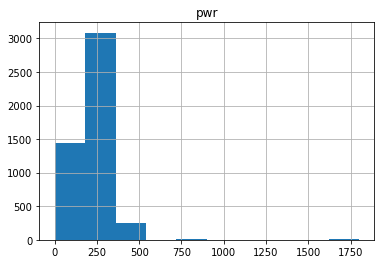

In [116]:
df.hist(column='pwr')

## Plots

Let's make more plots of various kinds.

In [ ]:
hr_df = df.groupby(['hr']).describe()
sns.lineplot(data=hr_df['pwr'][['25%', '50%', '75%']])